In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [4]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print (X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


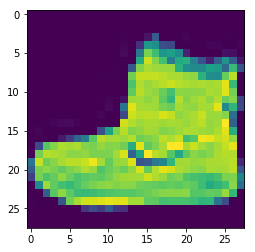

In [3]:
plt.imshow(X_train[0].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5723

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [6]:
pca = PCA(n_components=3)

In [ ]:
##your code

In [8]:
def step(dim=3, obj_num=10000):
    pca = PCA(n_components=dim)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), obj_num, replace=False)
    X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
    lr = LogisticRegression()
    lr.fit(X_train_lowdim, y_train[used_indices])
    return accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

####  Some information

In [25]:
k = 2
dim_list = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
results = np.empty((len(dim_list), k))
for d, dim in enumerate(dim_list):
    for i in tqdm(range(k), desc="%i components" % dim):
        res = step(dim)
        results[d, i] = res

5 components:: 100%|██████████| 2/2 [00:05<00:00,  2.67s/it]


In [16]:
mean = results.mean(axis=1)
var = results.var(axis=1)
std = results.std(axis=1)

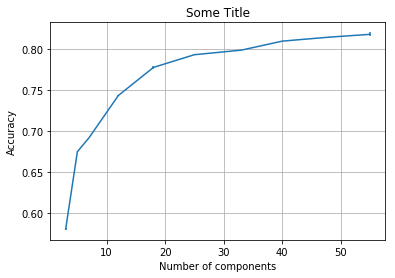

In [19]:
plt.errorbar(dim_list, mean, yerr=std)
plt.title("Some Title")
plt.xlabel("Number of components")
plt.ylabel("Accuracy")
plt.grid(True)

In [18]:
std

array([1.10e-03, 5.00e-05, 1.50e-04, 4.00e-04, 1.40e-03, 6.00e-04,
       1.50e-04, 2.50e-04, 7.00e-04, 2.55e-03])

In [28]:
X_train.shape

(60000, 28, 28)

In [31]:
pca = PCA(n_components=20)
pca.fit(X_train.reshape([-1, 784]))

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

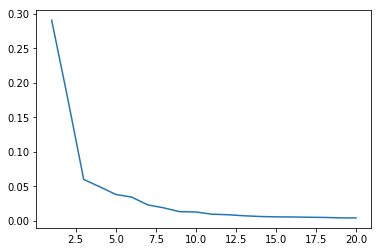

In [33]:
plt.plot(range(1, 21), pca.explained_variance_ratio_)